In [1]:
import pandas as  pd
import numpy as np

#Importing Data visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

##Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import datetime

In [3]:
Train=pd.read_csv("Data_Train.csv")

In [4]:
test=pd.read_csv("Test_set.csv")

In [5]:
Train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
Train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
Train.dropna()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [8]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 500.8+ KB


## DATA PREPROCESSING

In [9]:
Train['Date_of_Journey'] = Train['Date_of_Journey'].astype('datetime64[ns]')

In [10]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 542.6+ KB


In [11]:
Train["Journey_day"]=Train.Date_of_Journey.dt.day

In [12]:
Train["Journey_month"]=Train.Date_of_Journey.dt.month

In [13]:
Train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [14]:
Train.drop(['Date_of_Journey'],axis=1,inplace=True)

In [15]:
Train['Dep_Time'] = Train['Dep_Time'].astype('datetime64[ns]')

In [16]:
Train["Dep_Hour"]=Train.Dep_Time.dt.hour

In [17]:
Train["Dep_min"]=Train.Dep_Time.dt.minute

In [18]:
Train['Arrival_Time'] = Train['Arrival_Time'].astype('datetime64[ns]')

In [19]:
Train["Ar_Hour"]=Train.Arrival_Time.dt.hour

In [20]:
Train["Ar_min"]=Train.Arrival_Time.dt.minute

In [21]:
Train.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Journey_day        0
Journey_month      0
Dep_Hour           0
Dep_min            0
Ar_Hour            0
Ar_min             0
dtype: int64

In [22]:
Train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_min,Ar_Hour,Ar_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2021-03-23 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2021-03-23 05:50:00,2021-03-23 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2021-03-23 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,2021-03-23 18:05:00,2021-03-23 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,2021-03-23 16:50:00,2021-03-23 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [23]:
Train.drop(["Arrival_Time","Dep_Time"],axis=1,inplace=True)

In [24]:
#Assigning duration column to list
duration = list(Train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration            

In [25]:
Train["Dur_hr"]= duration_hours
Train["Dur_min"]= duration_mins


In [26]:
Train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_min,Ar_Hour,Ar_min,Dur_hr,Dur_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [27]:
Train.drop(["Duration"],axis=1,inplace=True)

In [28]:
Train["Additional_Info"].value_counts

<bound method IndexOpsMixin.value_counts of 0        No info
1        No info
2        No info
3        No info
4        No info
          ...   
10678    No info
10679    No info
10680    No info
10681    No info
10682    No info
Name: Additional_Info, Length: 10683, dtype: object>

In [29]:
Train.drop(["Additional_Info"],axis=1,inplace=True)

In [30]:
Train.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_min,Ar_Hour,Ar_min,Dur_hr,Dur_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,13302,3,1,16,50,21,35,4,45


## Handling Categorical Data

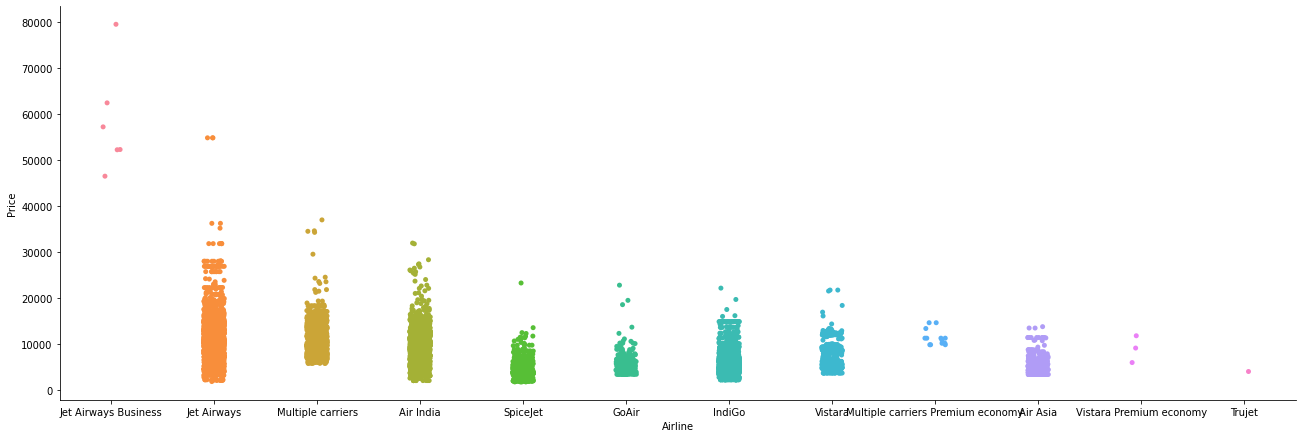

In [31]:
sns.catplot(y="Price", x ="Airline", data = Train.sort_values("Price" , ascending = False), kind = "strip" , height = 6 , aspect = 3)

In [32]:
Airline = Train["Airline"]

In [33]:
Airline =pd.get_dummies(Airline, drop_first=True)

In [34]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [35]:
Train.sort_values('Price')

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_min,Ar_Hour,Ar_min,Dur_hr,Dur_min
4066,SpiceJet,Mumbai,Hyderabad,BOM ? HYD,non-stop,1759,21,3,22,45,0,10,1,25
10513,SpiceJet,Mumbai,Hyderabad,BOM ? HYD,non-stop,1759,27,3,5,45,7,5,1,20
4839,SpiceJet,Mumbai,Hyderabad,BOM ? HYD,non-stop,1759,4,3,22,45,0,15,1,30
4274,SpiceJet,Mumbai,Hyderabad,BOM ? HYD,non-stop,1759,27,3,22,45,0,10,1,25
1513,Jet Airways,Mumbai,Hyderabad,BOM ? HYD,non-stop,1840,27,3,2,55,4,25,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,1 stop,54826,18,3,18,40,0,45,6,5
5439,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,1 stop,54826,3,1,16,55,23,0,6,5
10364,Jet Airways Business,Banglore,New Delhi,BLR ? MAA ? DEL,1 stop,57209,3,1,9,45,14,25,4,40
5372,Jet Airways Business,Banglore,New Delhi,BLR ? BOM ? DEL,1 stop,62427,3,1,5,45,12,25,6,40


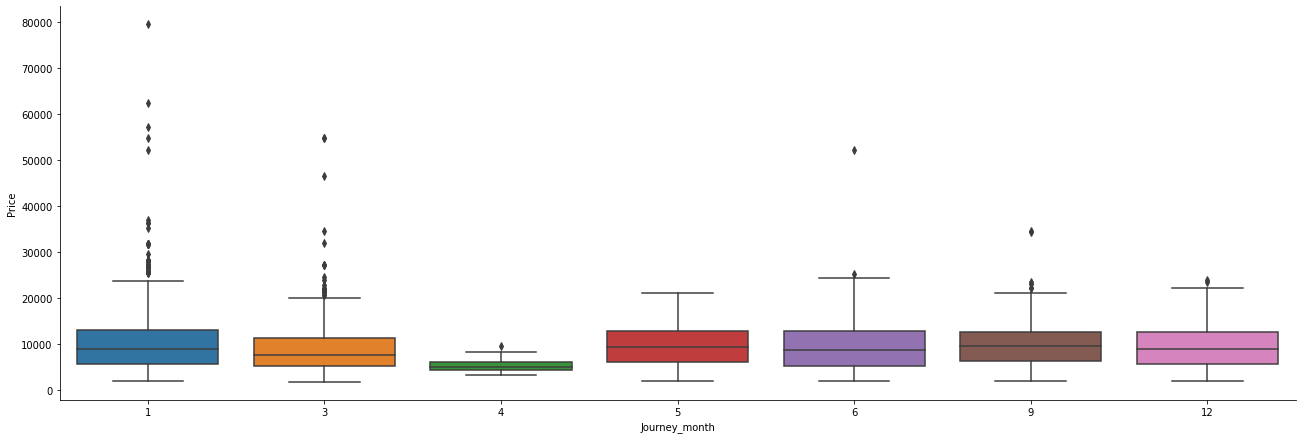

In [36]:
sns.catplot(y="Price", x ="Journey_month", data = Train.sort_values("Price" , ascending = False), kind = "box" , height = 6 , aspect = 3)

<AxesSubplot:xlabel='Source', ylabel='Price'>

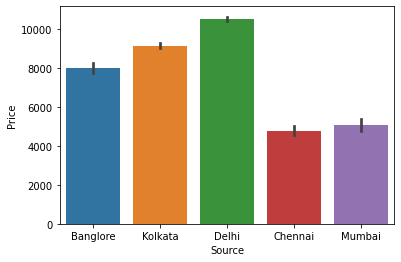

In [37]:
sns.barplot(x='Source', 
            y="Price", data=Train)

In [38]:
#performing one hot encoding for Source
Sources = Train[["Source"]]
Sources=pd.get_dummies(Sources, drop_first=True)

In [39]:
Sources

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [40]:
Train["Destination"].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

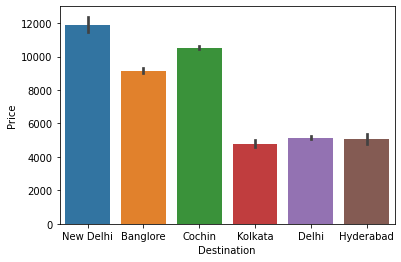

In [41]:
sns.barplot(x='Destination', 
            y="Price", data=Train)

In [42]:
#performing one hot encoding for Destination
destinations = Train[["Destination"]]
destinations=pd.get_dummies(destinations, drop_first=True)

In [43]:
destinations.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [44]:
Train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [45]:
Train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [46]:
Train.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_min,Ar_Hour,Ar_min,Dur_hr,Dur_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,0.0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2.0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2.0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1.0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1.0,13302,3,1,16,50,21,35,4,45


In [47]:
Train.drop(["Route"],axis=1,inplace=True)

In [48]:
data_train = pd.concat([Train, Airline, Sources, destinations], axis = 1)

In [49]:
pd.set_option('display.max_columns', None)

In [50]:
data_train

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_min,Ar_Hour,Ar_min,Dur_hr,Dur_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2.0,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2.0,13882,6,9,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1.0,6218,5,12,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1.0,13302,3,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0.0,4107,4,9,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,Air India,Kolkata,Banglore,0.0,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,0.0,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,Vistara,Banglore,New Delhi,0.0,12648,3,1,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [51]:
data_train.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [52]:
data_train

,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_min,Ar_Hour,Ar_min,Dur_hr,Dur_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.0,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2.0,13882,6,9,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1.0,6218,5,12,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1.0,13302,3,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,4107,4,9,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0.0,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0.0,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0.0,12648,3,1,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [53]:
data_train.isnull().sum()

Total_Stops                          1
Price                                0
Journey_day                          0
Journey_month                        0
Dep_Hour                             0
Dep_min                              0
Ar_Hour                              0
Ar_min                               0
Dur_hr                               0
Dur_min                              0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Source_Chennai                       0
Source_Delhi                         0
Source_Kolkata                       0
Source_Mumbai                        0
Destination_Cochin       

## TEST SET

In [54]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [55]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 104.4+ KB


In [56]:
test['Date_of_Journey'] = test['Date_of_Journey'].astype('datetime64[ns]')

In [57]:
test['Dep_Time'] = test['Dep_Time'].astype('datetime64[ns]')

In [58]:
test['Arrival_Time'] = test['Arrival_Time'].astype('datetime64[ns]')

In [59]:
test["Journey_day"]=test.Date_of_Journey.dt.day
test["Journey_month"]=test.Date_of_Journey.dt.month
test["Dep_Hour"]=test.Dep_Time.dt.hour
test["Dep_min"]=test.Dep_Time.dt.minute
test["Ar_Hour"]=test.Arrival_Time.dt.hour
test["Ar_min"]=test.Arrival_Time.dt.minute

In [60]:
duration = list(test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration 

In [61]:
test["Dur_hr"]= duration_hours
test["Dur_min"]= duration_mins

In [62]:
Airline = test["Airline"]
Airline =pd.get_dummies(Airline, drop_first=True)

In [63]:
test.drop(["Airline","Additional_Info","Arrival_Time","Dep_Time","Duration","Date_of_Journey"],axis=1,inplace=True)

In [64]:
Sources = test[["Source"]]
Sources=pd.get_dummies(Sources, drop_first=True)
destinations = test[["Destination"]]
destinations=pd.get_dummies(destinations, drop_first=True)

In [65]:
test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [66]:
test.drop(["Route","Source","Destination"],axis=1,inplace=True)

In [67]:
test.isnull().sum()

Total_Stops      0
Journey_day      0
Journey_month    0
Dep_Hour         0
Dep_min          0
Ar_Hour          0
Ar_min           0
Dur_hr           0
Dur_min          0
dtype: int64

In [68]:
test_data=pd.concat([test,Airline,destinations,Sources],axis=1)

In [69]:
test_data

,Total_Stops,Journey_day,Journey_month,Dep_Hour,Dep_min,Ar_Hour,Ar_min,Dur_hr,Dur_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,5,12,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,30,20,25,23,55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2667,0,27,3,14,20,16,55,2,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2668,1,3,6,21,50,4,25,6,35,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2669,1,3,6,4,0,19,15,15,15,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [70]:
data_train.columns.tolist()

['Total_Stops',
 'Price',
 'Journey_day',
 'Journey_month',
 'Dep_Hour',
 'Dep_min',
 'Ar_Hour',
 'Ar_min',
 'Dur_hr',
 'Dur_min',
 'Air India',
 'GoAir',
 'IndiGo',
 'Jet Airways',
 'Jet Airways Business',
 'Multiple carriers',
 'Multiple carriers Premium economy',
 'SpiceJet',
 'Trujet',
 'Vistara',
 'Vistara Premium economy',
 'Source_Chennai',
 'Source_Delhi',
 'Source_Kolkata',
 'Source_Mumbai',
 'Destination_Cochin',
 'Destination_Delhi',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Destination_New Delhi']

In [71]:
test_data.columns.tolist()

['Total_Stops',
 'Journey_day',
 'Journey_month',
 'Dep_Hour',
 'Dep_min',
 'Ar_Hour',
 'Ar_min',
 'Dur_hr',
 'Dur_min',
 'Air India',
 'GoAir',
 'IndiGo',
 'Jet Airways',
 'Jet Airways Business',
 'Multiple carriers',
 'Multiple carriers Premium economy',
 'SpiceJet',
 'Vistara',
 'Vistara Premium economy',
 'Destination_Cochin',
 'Destination_Delhi',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Destination_New Delhi',
 'Source_Chennai',
 'Source_Delhi',
 'Source_Kolkata',
 'Source_Mumbai']

## Checking Multicollinearity

In [72]:
Train=Train.dropna()

In [73]:
Train["Total_Stops"].isna().sum()

0

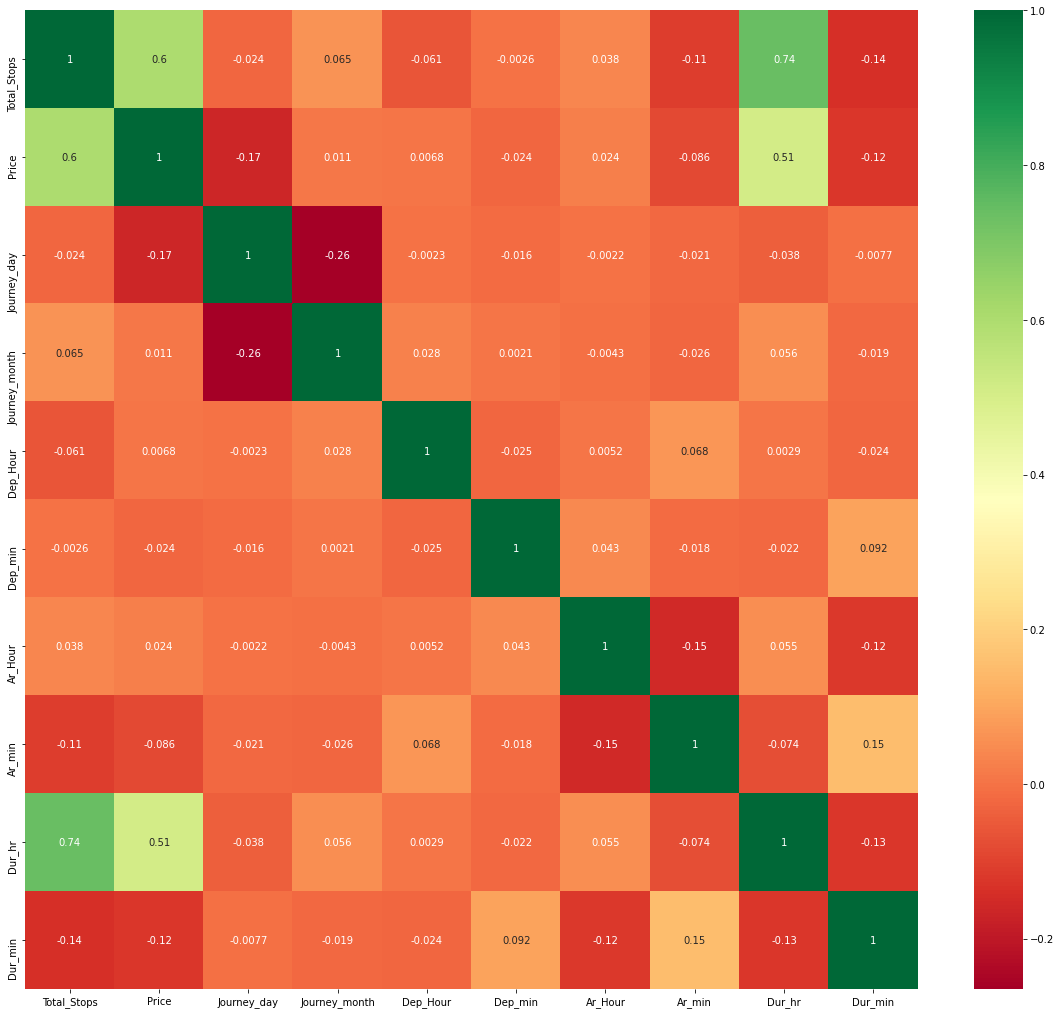

In [74]:
#1. Pearson's correlation

plt.figure(figsize = (20,18))
sns.heatmap(Train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [75]:
data_train=data_train.dropna()

In [76]:
x= data_train.drop(["Price"],axis=1)
y= data_train["Price"]

In [77]:
data_train.isnull().sum()

Total_Stops                          0
Price                                0
Journey_day                          0
Journey_month                        0
Dep_Hour                             0
Dep_min                              0
Ar_Hour                              0
Ar_min                               0
Dur_hr                               0
Dur_min                              0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Source_Chennai                       0
Source_Delhi                         0
Source_Kolkata                       0
Source_Mumbai                        0
Destination_Cochin       

In [78]:
!pip install statsmodels

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [79]:
#2. VIF
#Import VIF library
from statsmodels.stats.outliers_influence import variance_inflation_factor 
W = Train[['Total_Stops','Journey_day','Journey_month','Dep_Hour','Dep_min','Ar_Hour','Ar_min','Dur_hr','Dur_min']] 
vif_data = pd.DataFrame() 
vif_data["feature"] = W.columns 


In [80]:
#calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(W.values, i) 
                          for i in range(len(W.columns))] 
print(vif_data)

         feature       VIF
0    Total_Stops  5.472083
1    Journey_day  2.768462
2  Journey_month  3.888677
3       Dep_Hour  4.852107
4        Dep_min  2.596958
5        Ar_Hour  4.023597
6         Ar_min  3.074950
7         Dur_hr  5.453263
8        Dur_min  3.511130


In [81]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

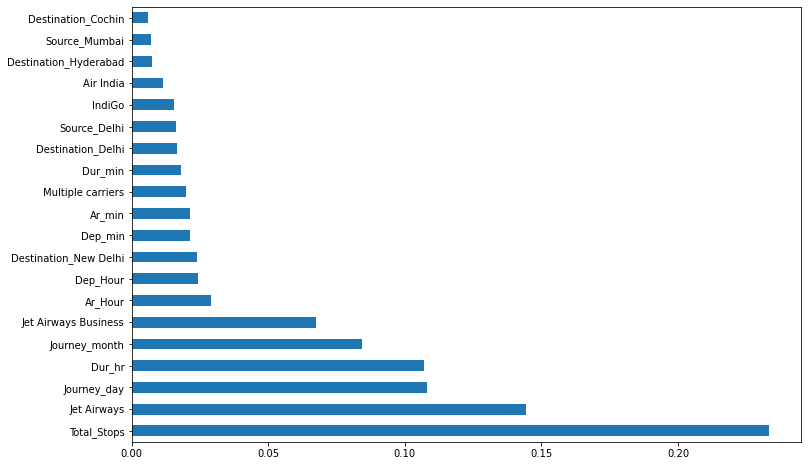

In [82]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [84]:
from sklearn.linear_model import LinearRegression
reg_lr = LinearRegression()
reg_lr.fit(X_train, y_train)

LinearRegression()

In [85]:
reg_lr.score(X_test, y_test)

0.6165460428239091

In [86]:
reg_lr.score(X_train, y_train)

0.6180994642190929

In [88]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)


RandomForestRegressor()

In [89]:
reg_rf.score(X_train, y_train)

0.9522727114616977

In [90]:
reg_rf.score(X_test, y_test)


0.7892534086554871

In [100]:
y_pred = reg_rf.predict(X_test)

In [91]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(normalize=True, max_iter=15)

In [92]:
lassoreg.fit(X_train, y_train)

Lasso(max_iter=15, normalize=True)

In [93]:
lassoreg.score(X_train, y_train)

0.6089888408899651

In [94]:
lassoreg.score(X_test, y_test)

0.6038003923752103

In [97]:
from sklearn import metrics

In [95]:
y_prediction = reg_rf.predict(X_test)

In [98]:
metrics.r2_score(y_test, y_prediction)

0.7892534086554871

In [101]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1194.350014346959
MSE: 4544129.872695494
RMSE: 2131.696477619526


In [102]:
from sklearn.model_selection import RandomizedSearchCV

In [103]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 900, num = 9)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [104]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [105]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [106]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=15, total=  23.8s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.7s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=15, total=  23.1s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=15, total=  24.0s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=15, total=  23.6s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=15, total=  23.8s
[CV] n_estimators=800, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=  11.8s
[CV] n_estimators=800, min_samples_split=15

[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=25, total=  24.8s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=25, total=  24.1s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=25, total=  24.7s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=25, total=  24.1s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=25, total=  24.8s
[CV] n_estimators=300, min_samples

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 16.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [107]:
prediction = rf_random.predict(X_test)

In [109]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20}

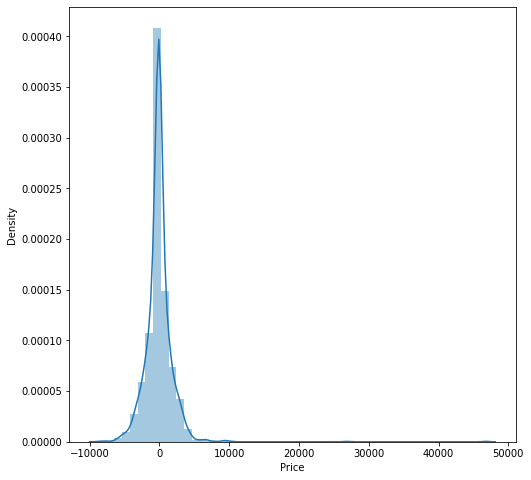

In [110]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [108]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1159.9567999276792
MSE: 4272349.6326853875
RMSE: 2066.96628726387
